In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mplsoccer import Pitch

In [36]:
df = pd.read_csv('events-rodrigo.csv')
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Guilford,Rodrigo,Pass,0,17,80,8,71,10
1,Guilford,Rodrigo,Dribble,0,24,82,10,80,14
2,Guilford,Rodrigo,Cross,0,27,79,15,97,64
3,Guilford,Rodrigo,Interception,0,47,72,34,-,-
4,Guilford,Rodrigo,Dribble,0,47,72,32,78,40
5,Guilford,Rodrigo,Shot,0,47,81,41,100,56
6,Guilford,Rodrigo,Pass,0,56,81,83,70,77
7,Guilford,Rodrigo,Pass,1,9,77,65,89,78
8,Guilford,Rodrigo,Dribble,1,20,80,86,87,89
9,Guilford,Rodrigo,Dribble,1,34,57,33,79,40


In [37]:
df['Event'] = df['Event'].replace(['Cross'],'Pass')
df = df.loc[df['Event'] == 'Pass'].reset_index()

In [45]:
df

,index,Team,Player,Event,Mins,Secs,X,Y,X2,Y2,beginning,end,progressive
0,0,Guilford,Rodrigo,Pass,0,17,96.0,6.4,85.2,8.0,41.291161,47.276210,False
1,2,Guilford,Rodrigo,Pass,0,27,94.8,12.0,116.4,51.2,37.670147,11.764353,True
2,6,Guilford,Rodrigo,Pass,0,56,97.2,66.4,84.0,61.6,34.882660,41.982854,False
3,7,Guilford,Rodrigo,Pass,1,9,92.4,52.0,106.8,62.4,30.095847,26.000000,False
4,12,Guilford,Rodrigo,Pass,1,47,76.8,29.6,74.4,39.2,44.434221,45.607017,False
5,14,Guilford,Rodrigo,Pass,2,9,57.6,29.6,67.2,50.4,63.260730,53.814496,False
6,15,Guilford,Rodrigo,Pass,2,20,66.0,38.4,49.2,23.2,54.023699,72.765926,False
7,18,Guilford,Rodrigo,Pass,2,52,94.8,20.8,102.0,8.8,31.680909,36.019994,False
8,19,Guilford,Rodrigo,Pass,3,11,81.6,15.2,79.2,22.4,45.712143,44.434221,False
9,20,Guilford,Rodrigo,Pass,3,23,93.6,25.6,96.0,46.4,30.071914,24.838680,False


In [39]:
df.X2 = df.X2.astype('float')
df.Y2 = df.Y2.astype('float')

In [40]:
df.X = df.X*1.2
df.Y = df.Y*0.8
df.X2 = df.X2*1.2
df.Y2 = df.Y2*0.8

In [41]:
df['beginning'] = np.sqrt(np.square(120 - df['X']) + np.square(40 - df['Y']))
df['end'] = np.sqrt(np.square(120 - df['X2']) + np.square(40 - df['Y2']))

In [42]:
df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < 0.75 for x in range(len(df['beginning']))]

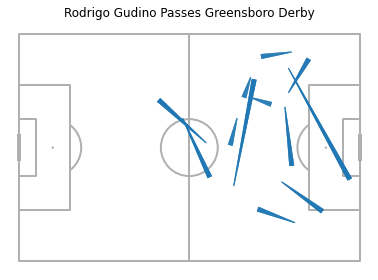

In [44]:
pitch = Pitch(pitch_type='statsbomb')
fig, ax = pitch.draw()
plt.title('Rodrigo Gudino Passes Greensboro Derby')

pitch.lines(df.X, df.Y, df.X2, df.Y2, comet=True, ax=ax);